**importing necessary libraries**

In [1]:
from fastai.vision.all import *
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
from sklearn.metrics import accuracy_score

In [2]:
#requesting to upload .json file
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"vinumagdum114","key":"0bce0337459598673b64c02510600884"}'}

In [4]:
!mkdir ~/.kaggle    #creates a directory

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [5]:
! cp kaggle.json ~/.kaggle/     #copies the file named kaggle.json to the directory

In [6]:
! chmod 600 ~/.kaggle/kaggle.json   #sets the permissions of the kaggle.json

In [7]:
!kaggle datasets download -d meowmeowmeowmeowmeow/gtsrb-german-traffic-sign   #downloads a dataset from Kaggle using the Kaggle API

100% 612M/612M [00:16<00:00, 37.4MB/s]
100% 612M/612M [00:16<00:00, 38.7MB/s]


In [9]:
import zipfile
import os

# Specify the path of the uploaded ZIP file
zip_path = '/content/gtsrb-german-traffic-sign.zip'

# Specify the directory path where you want to extract the contents
extract_path = '/content/extracted_images'

# Extract the contents of the ZIP file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

# Verify the extraction by listing the files in the extracted directory
file_list = os.listdir(extract_path)
print(file_list)

['test', 'train', 'meta', 'Meta', 'Train.csv', 'Train', 'Test', 'Meta.csv', 'Test.csv']


In [10]:
train_df = pd.read_csv('/content/extracted_images/Train.csv')
# display a sneak peek of the data
train_df.head()

Width  Height  Roi.X1  Roi.Y1  Roi.X2  Roi.Y2  ClassId  \
0     27      26       5       5      22      20       20   
1     28      27       5       6      23      22       20   
2     29      26       6       5      24      21       20   
3     28      27       5       6      23      22       20   
4     28      26       5       5      23      21       20   

                             Path  
0  Train/20/00020_00000_00000.png  
1  Train/20/00020_00000_00001.png  
2  Train/20/00020_00000_00002.png  
3  Train/20/00020_00000_00003.png  
4  Train/20/00020_00000_00004.png

In [11]:
print(f'Number of classes: {train_df.ClassId.unique().shape[0]}')

Number of classes: 43


In [12]:
#Labling the images with actual traffic sign name
labels = ['20 km/h', '30 km/h', '50 km/h', '60 km/h', '70 km/h', '80 km/h', '80 km/h end', '100 km/h', '120 km/h', 'No overtaking',
               'No overtaking for trucks', 'Crossroad with secondary way', 'Main road', 'Give way', 'Stop', 'Road up', 'Road up for truck', 'No entry',
               'Other dangerous', 'Turn left', 'Turn right', 'Winding road', 'Hollow road', 'Slippery road', 'Narrowing road', 'Roadwork', 'Traffic light',
               'Pedestrian', 'Children', 'Bike', 'Snow', 'Deer', 'End of the limits', 'Only right', 'Only left', 'Only straight', 'Only straight and right',
               'Only straight and left', 'Take right', 'Take left', 'Circle crossroad', 'End of overtaking limit', 'End of overtaking limit for truck']
# add column with readable labels
train_df['Label'] = train_df['ClassId'].replace(sorted(train_df['ClassId'].unique()), labels)
# print updated df
train_df.head(10)

Width  Height  Roi.X1  Roi.Y1  Roi.X2  Roi.Y2  ClassId  \
0     27      26       5       5      22      20       20   
1     28      27       5       6      23      22       20   
2     29      26       6       5      24      21       20   
3     28      27       5       6      23      22       20   
4     28      26       5       5      23      21       20   
5     31      27       6       5      26      22       20   
6     31      28       6       6      26      23       20   
7     31      28       6       6      26      23       20   
8     31      29       5       6      26      24       20   
9     34      32       6       6      29      26       20   

                             Path       Label  
0  Train/20/00020_00000_00000.png  Turn right  
1  Train/20/00020_00000_00001.png  Turn right  
2  Train/20/00020_00000_00002.png  Turn right  
3  Train/20/00020_00000_00003.png  Turn right  
4  Train/20/00020_00000_00004.png  Turn right  
5  Train/20/00020_00000_00005.png  Turn right  
6  Train/20/00020_00000_00006.png  Turn right  
7  Train/20/00020_00000_00007.png  Turn right  
8  Train/20/00020_00000_00008.png  Turn right  
9  Train/20/00020_00000_00009.png  Turn right

In [13]:
#counts of each unique label in the Label column
counts = train_df['Label'].value_counts()
print(counts)

Label
50 km/h                              2250
30 km/h                              2220
Give way                             2160
Main road                            2100
Take right                           2070
No overtaking for trucks             2010
70 km/h                              1980
80 km/h                              1860
Roadwork                             1500
No overtaking                        1470
100 km/h                             1440
60 km/h                              1410
120 km/h                             1410
Crossroad with secondary way         1320
Only straight                        1200
Other dangerous                      1200
No entry                             1110
Stop                                  780
Deer                                  780
Only right                            689
Road up                               630
Traffic light                         600
Children                              540
Slippery road               

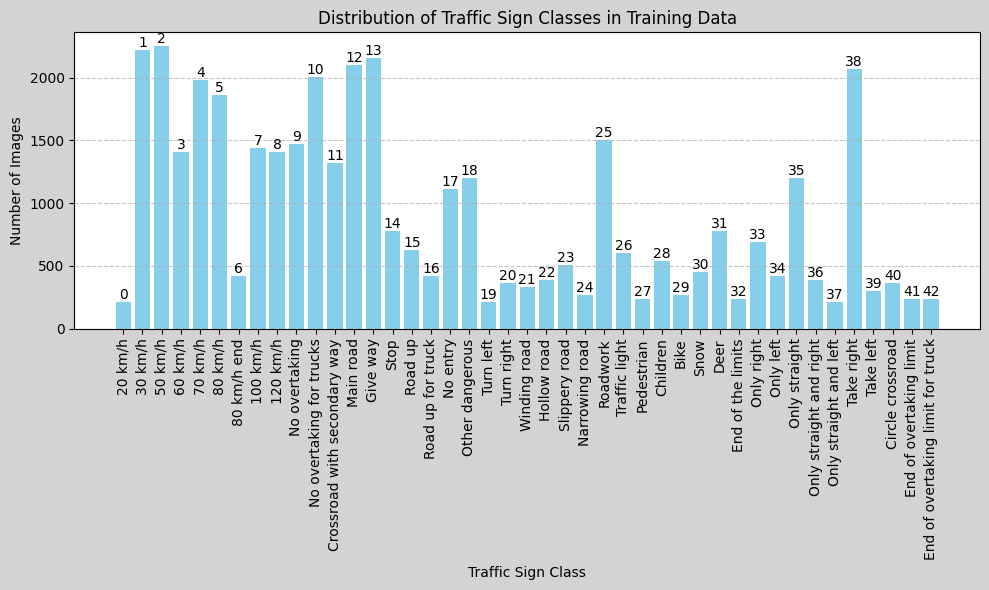

In [14]:
# Load the training data set of GTSRB
training_data = pd.read_csv('/content/extracted_images/Train.csv')

# Mapping ClassID values to their corresponding labels
class_labels = ['20 km/h', '30 km/h', '50 km/h', '60 km/h', '70 km/h', '80 km/h', '80 km/h end', '100 km/h', '120 km/h', 'No overtaking',
               'No overtaking for trucks', 'Crossroad with secondary way', 'Main road', 'Give way', 'Stop', 'Road up', 'Road up for truck', 'No entry',
               'Other dangerous', 'Turn left', 'Turn right', 'Winding road', 'Hollow road', 'Slippery road', 'Narrowing road', 'Roadwork', 'Traffic light',
               'Pedestrian', 'Children', 'Bike', 'Snow', 'Deer', 'End of the limits', 'Only right', 'Only left', 'Only straight', 'Only straight and right',
               'Only straight and left', 'Take right', 'Take left', 'Circle crossroad', 'End of overtaking limit', 'End of overtaking limit for truck']


# Group the data by class and count the occurrences of each class
class_counts = training_data['ClassId'].value_counts().sort_index()

# Plotting
plt.figure(figsize=(10, 6), facecolor='lightgrey')
bars = plt.bar(class_counts.index, class_counts.values, color='skyblue')
plt.xlabel('Traffic Sign Class')
plt.ylabel('Number of Images')
plt.title('Distribution of Traffic Sign Classes in Training Data')
plt.xticks(class_counts.index, [class_labels[class_id] for class_id in class_counts.index], rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add ClassID values on the bars
for bar, class_id in zip(bars, class_counts.index):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height, class_id, ha='center', va='bottom')

plt.tight_layout()
plt.show()


**Creating an ImageDataLoaders object using the from_df method, fastai automatically splits the data into training (80%) and validation sets (20%) by default.**

In [16]:
# pixels and spliting the dataset into training and validation data
dls = ImageDataLoaders.from_df(train_df, fn_col='Path', label_col='Label', path="/content/extracted_images", seed=42, item_tfms=Resize(224))

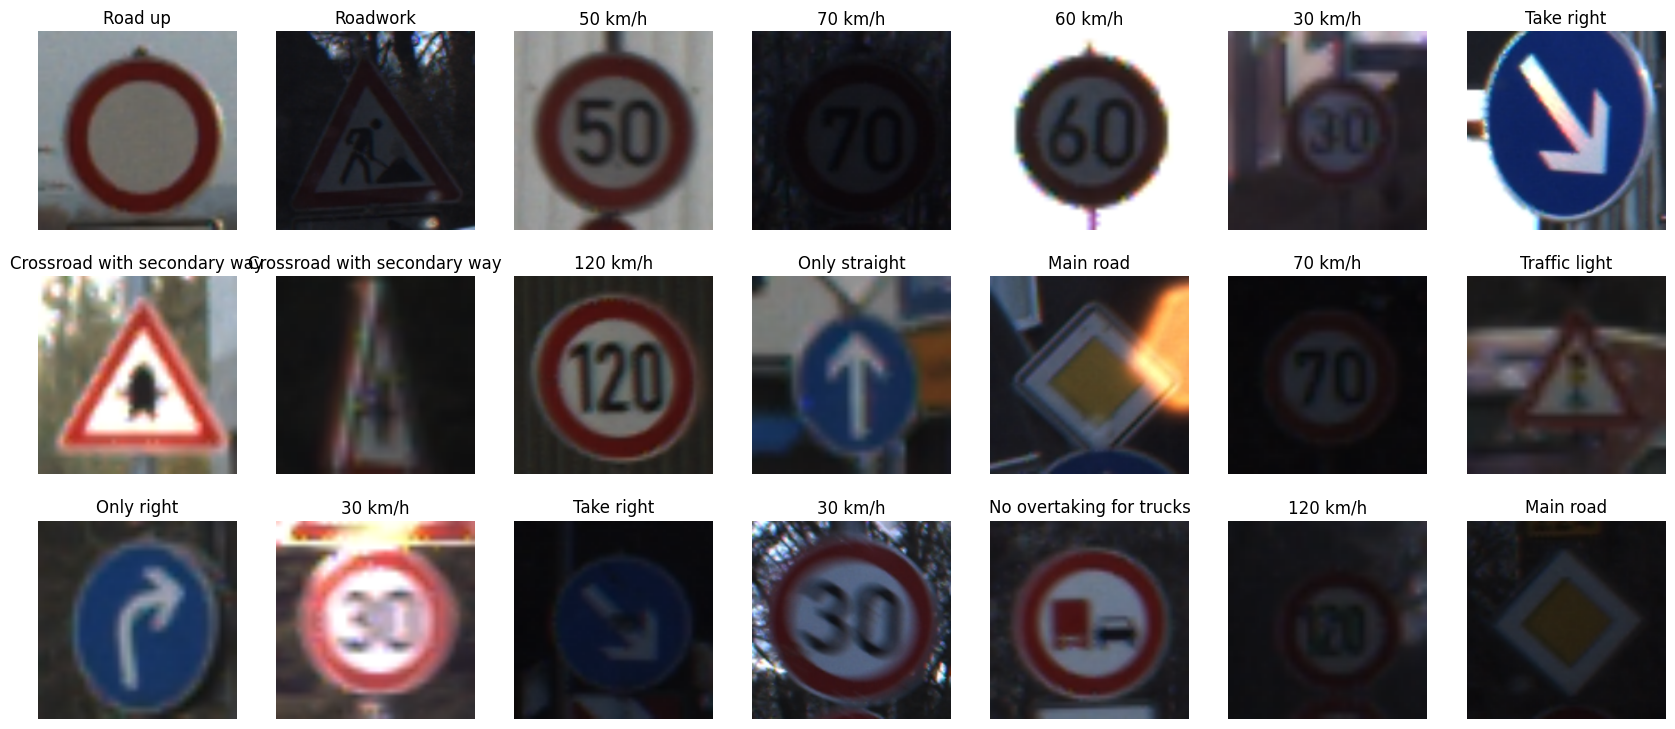

In [17]:
#Loading and viewing training images for inspections (How they look)
dls.train.show_batch(max_n=21, nrows=3)

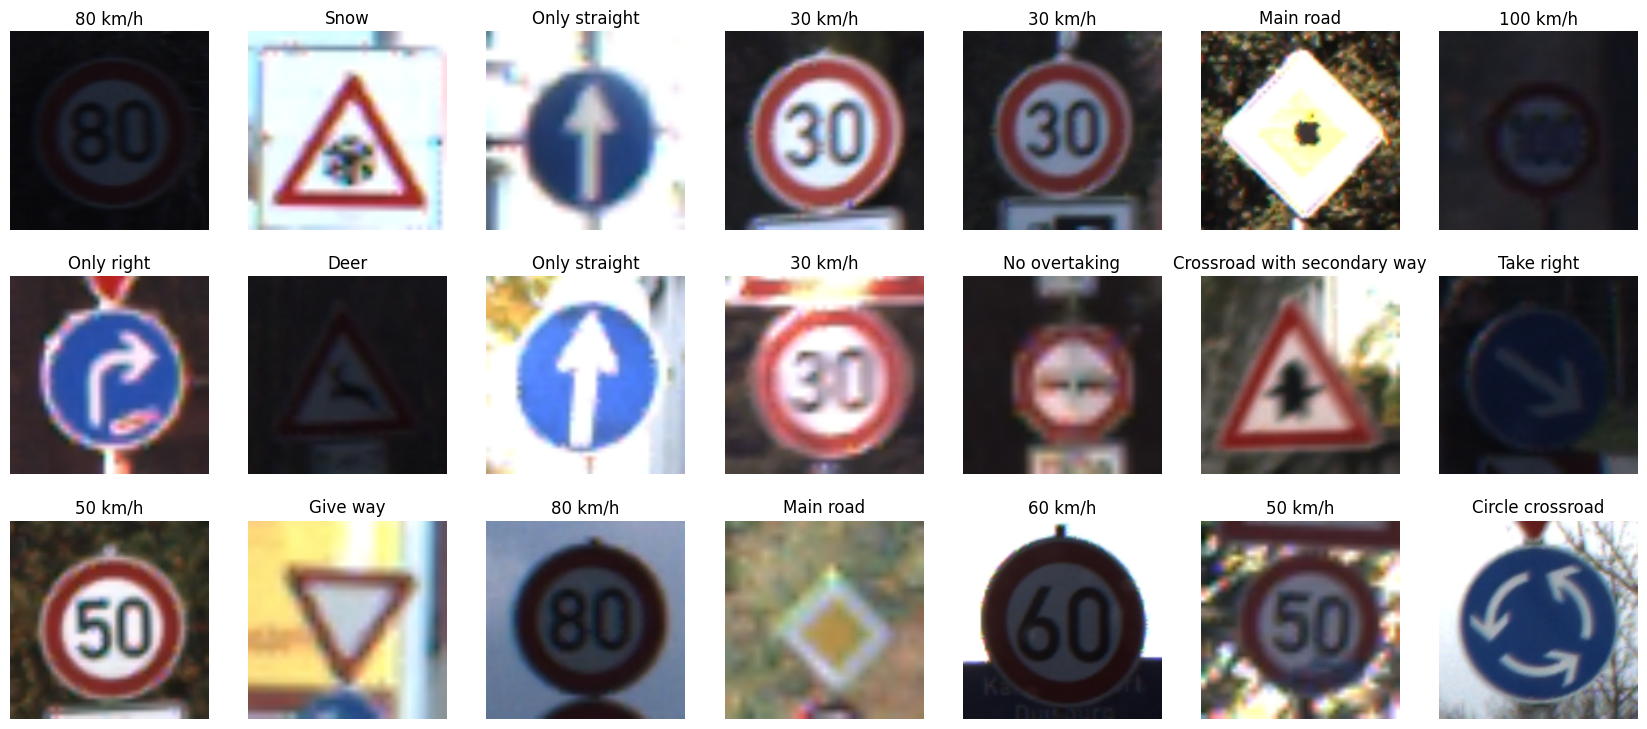

In [18]:
#Loading and viewing images for validation
dls.valid.show_batch(max_n=21, nrows=3)

**NB:By viewing and inspecting Some images in the dataset are quite dark, the model might struggle**

In [19]:
meta_df = pd.read_csv('/content/extracted_images/Meta.csv') #Loading meta file

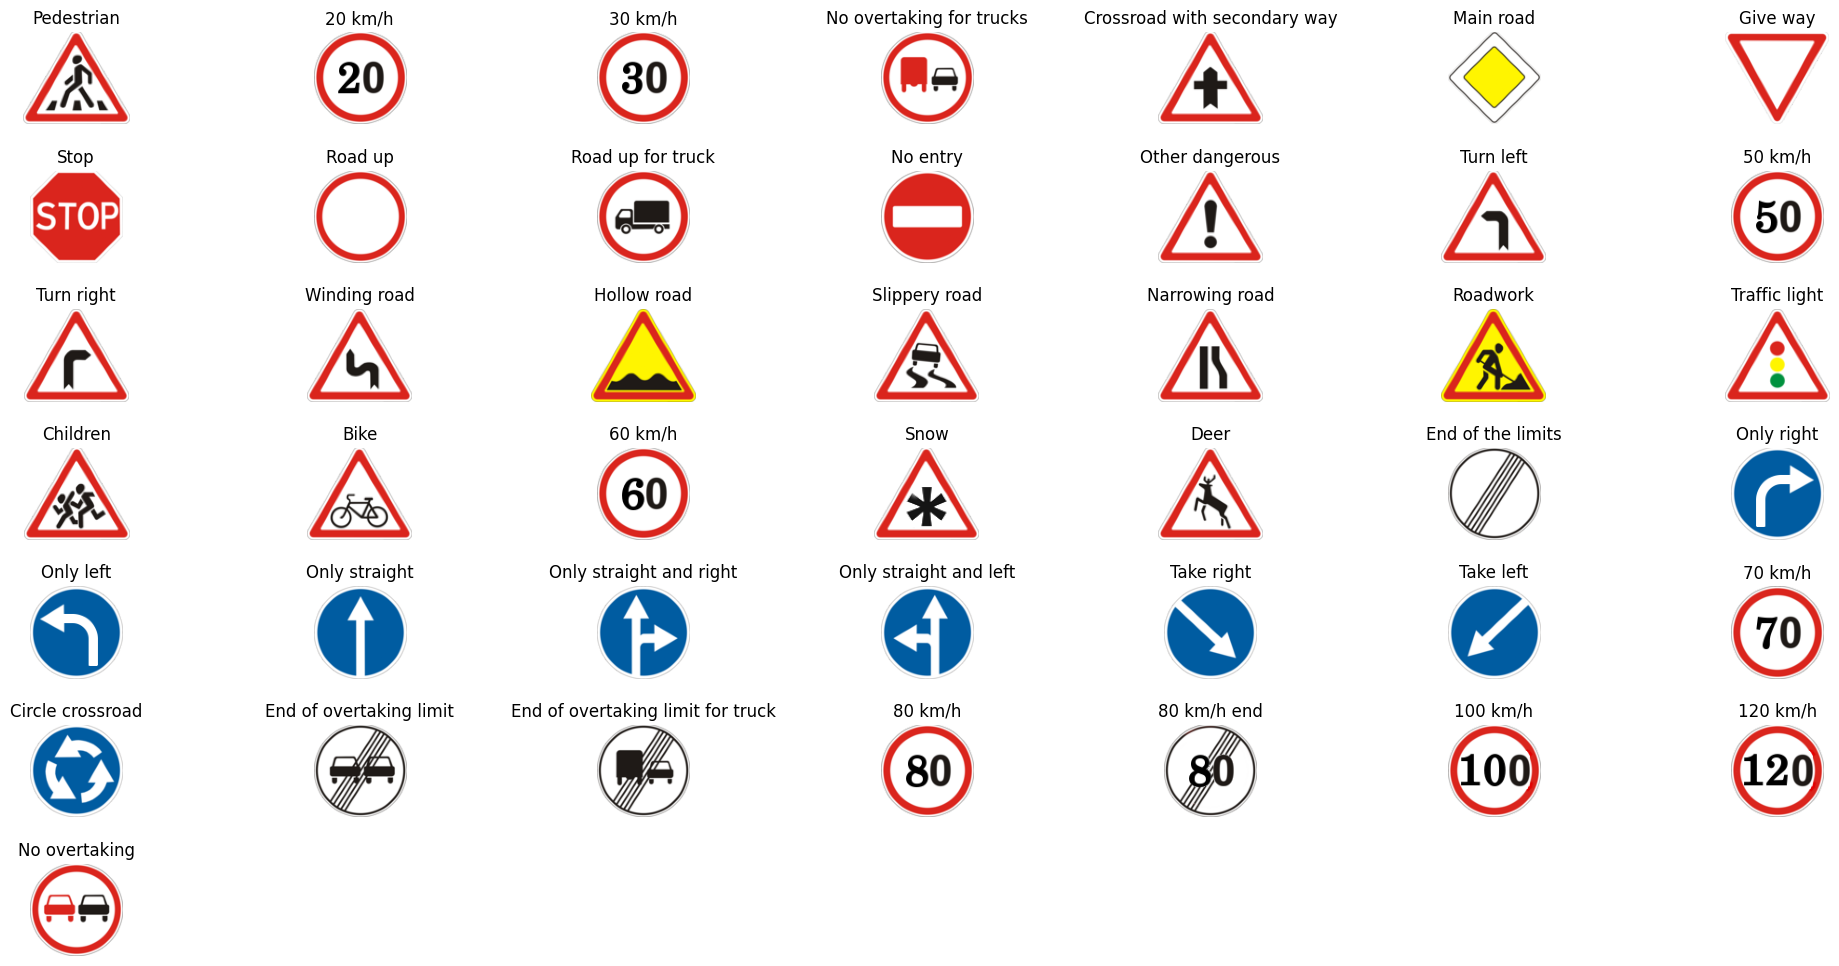

In [20]:
# Display a grid of meta images along with their corresponding labels
import math

def display_images_with_labels(images, labels, ncols=7):
    plt.figure(figsize=(25,12))
    plt.subplots_adjust(hspace=0.5)
    nrows = math.ceil(len(images) / ncols)  # Round up to the nearest integer
    for i, image in enumerate(images):
        img_idx = i + 1
        ax = plt.subplot(nrows, ncols, img_idx, title=labels[i], frame_on=False)
        ax.imshow(image)
        ax.axis("off")

# build the list of images and display them
meta_df['ImgPath'] = "/content/extracted_images/" + meta_df["Path"]  # Corrected path construction
images = meta_df['ImgPath'].apply(mpimg.imread)
img_labels = meta_df['ClassId'].replace(sorted(meta_df['ClassId'].unique()), labels)
display_images_with_labels(images, img_labels)

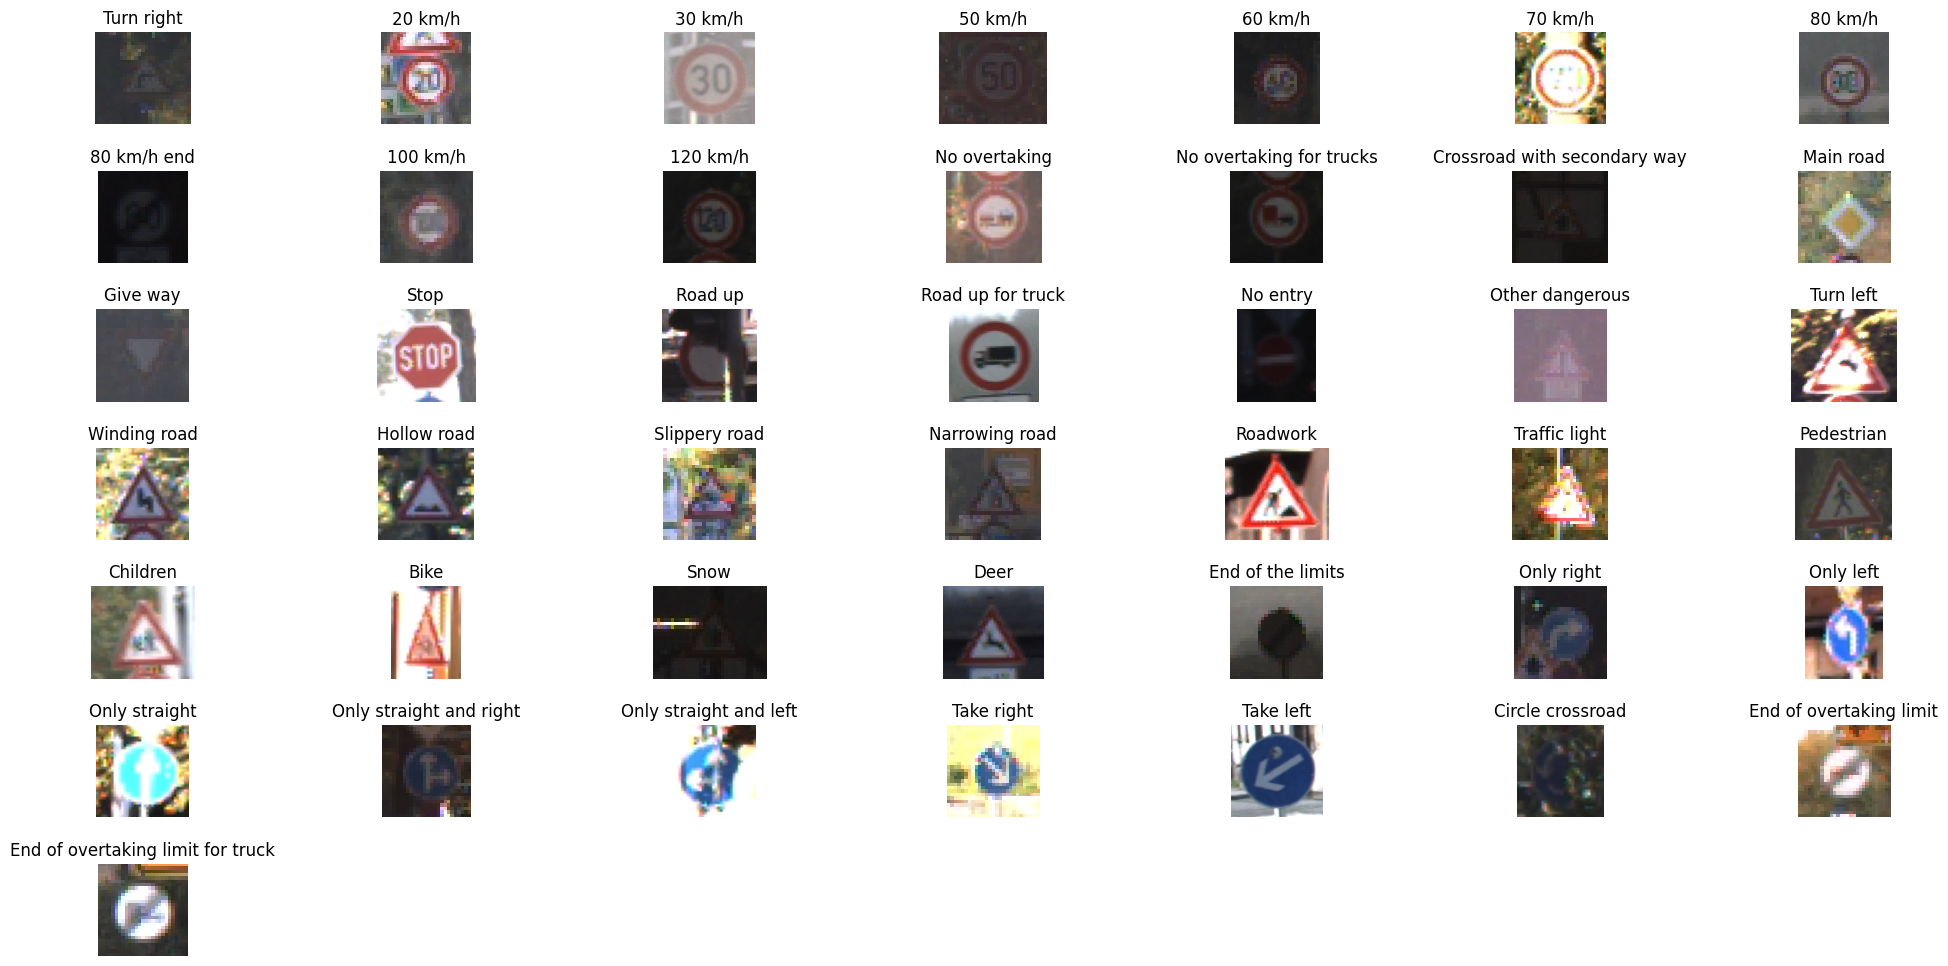

In [21]:
# build the list of images to show
train_df['ImgPath'] = "/content/extracted_images/" + train_df["Path"]
uniq_train_df = train_df.drop_duplicates(subset=['Label'])
images = uniq_train_df['ImgPath'].apply(mpimg.imread)
img_labels = uniq_train_df['Label'].values

display_images_with_labels(images, img_labels)

In [22]:
from fastai.metrics import Precision, Recall, F1Score

# Create the learner object with the desired metrics
learn = vision_learner(dls, resnet34, metrics=[error_rate, accuracy, Precision(average='weighted'), Recall(average='weighted'), F1Score(average='weighted')], model_dir=Path("/content/extracted_images"))
learn.fine_tune(8)

Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth
100%|██████████| 83.3M/83.3M [00:00<00:00, 99.6MB/s]


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os

In [24]:
learn.export('/content/extracted_images/export.pkl')

In [25]:
interp = ClassificationInterpretation.from_learner(learn)

/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


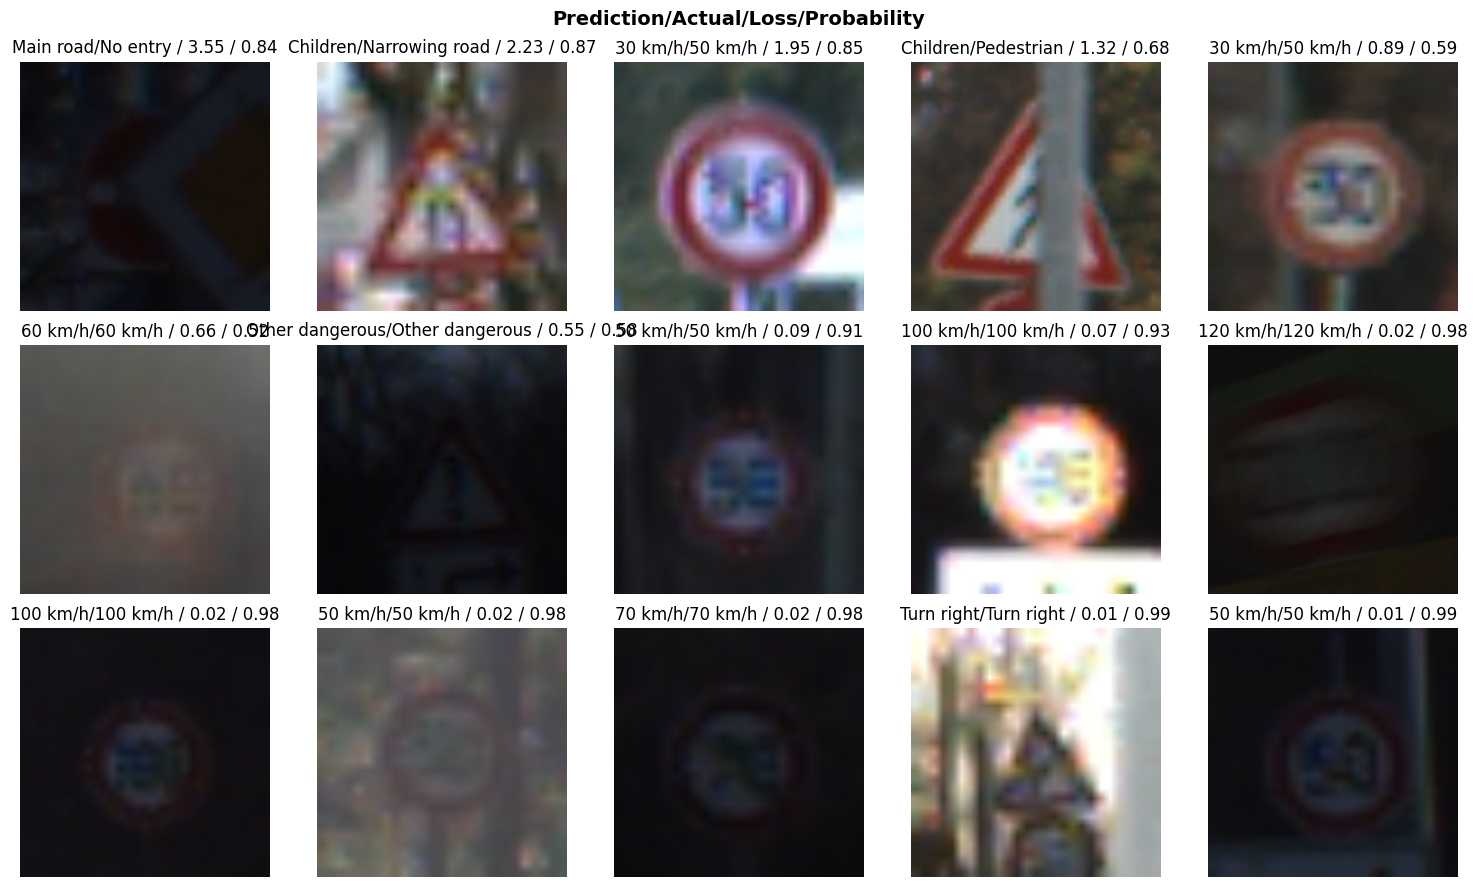

In [26]:
interp.plot_top_losses(15, nrows=3)
plt.tight_layout()
plt.show()


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


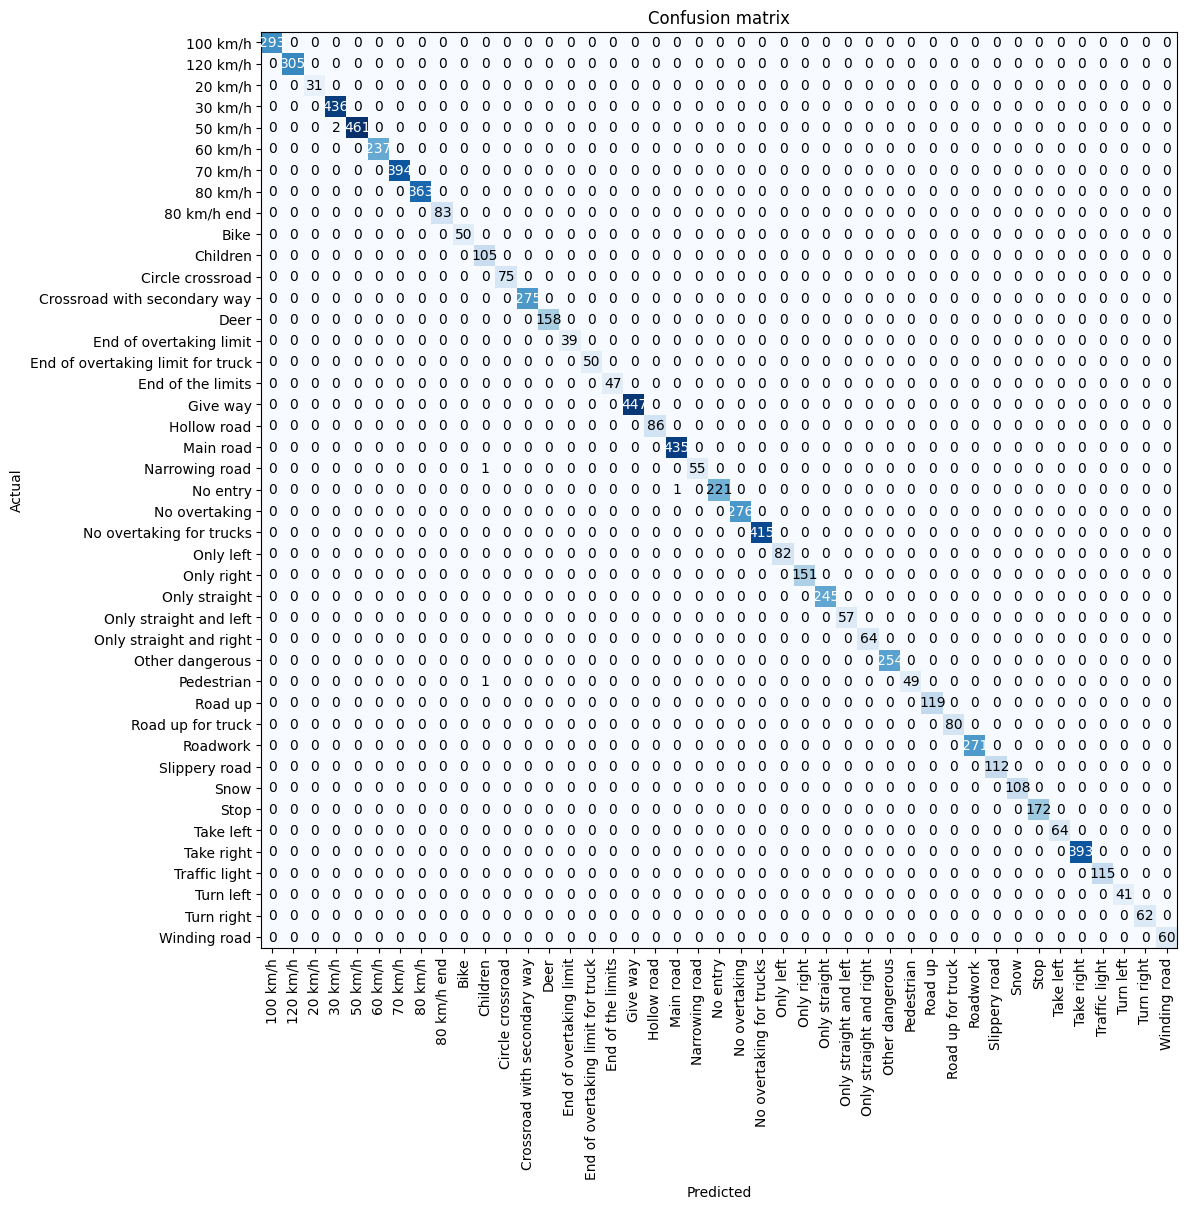

In [27]:
interp.plot_confusion_matrix(figsize=(25,12))

In [28]:
mc = interp.most_confused()
mc

/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


[('50 km/h', '30 km/h', 2),
 ('Narrowing road', 'Children', 1),
 ('No entry', 'Main road', 1),
 ('Pedestrian', 'Children', 1)]

In [29]:
# load the model
learn_inf = load_learner('/content/extracted_images/export.pkl')

In [30]:
# helper func to predict and provide probability.
def predict(img_path, proba=False):
    pred,pred_idx,probs = learn_inf.predict(img_path)
    return [pred,pred_idx,probs] if proba else pred

# test predict function
pred,pred_idx,probs = predict('/content/extracted_images/Test/00000.png', proba=True)

# Test prediction
print(f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}')

Prediction: Road up for truck; Probability: 1.0000


In [31]:
# load test data
test_df = pd.read_csv('/content/extracted_images/Test.csv')

In [32]:
# add full path for each image
test_df['ImgPath'] = '/content/extracted_images/' + test_df.Path

In [33]:
%%capture
# Add prediction for each image in the test set
test_df['Category'] = test_df.ImgPath.apply(predict)

In [34]:
# convert numerical category to labels
test_df['Label'] = test_df['ClassId'].replace(sorted(test_df['ClassId'].unique()), labels)

In [35]:
acc = accuracy_score(test_df['Label'], test_df['Category'])
# acc = 0.9884402216943785
print(f"Test data accuracy = {acc:.4f}")

Test data accuracy = 0.9880


In [36]:
from sklearn.metrics import classification_report

# Convert numerical category to labels
test_df['Label'] = test_df['ClassId'].replace(sorted(test_df['ClassId'].unique()), labels)

# Generate classification report
report = classification_report(test_df['Label'], test_df['Category'])

# Print classification report
print(report)



                                   precision    recall  f1-score   support

                         100 km/h       1.00      1.00      1.00       450
                         120 km/h       0.99      0.97      0.98       450
                          20 km/h       1.00      1.00      1.00        60
                          30 km/h       1.00      1.00      1.00       720
                          50 km/h       0.99      1.00      1.00       750
                          60 km/h       0.99      0.98      0.98       450
                          70 km/h       1.00      0.99      1.00       660
                          80 km/h       0.96      0.98      0.97       630
                      80 km/h end       0.99      1.00      1.00       150
                             Bike       0.99      1.00      0.99        90
                         Children       0.99      1.00      1.00       150
                 Circle crossroad       0.99      0.97      0.98        90
     Crossroad with seco

In [1]:
# Load the test dataset
test_data = ImageDataLoaders.from_df(test_df,
                                     path="/content/extracted_images/",
                                     valid_pct=0.,
                                     label_col='Label',
                                     item_tfms=Resize(224))

# Get predictions for the test dataset
test_predictions = learn.get_preds(dl=test_data.train_dl)

# Calculate the test loss
test_loss = learn.loss_func(*test_predictions).item()
print("Test Loss:", test_loss)


NameError: name 'ImageDataLoaders' is not defined

In [2]:
# Load the test dataset
test_data = ImageDataLoaders.from_df(test_df,
                                     path="/content/extracted_images/",
                                     valid_pct=0.,
                                     label_col='Label',
                                     item_tfms=Resize(224))

# Get predictions for the test dataset
test_predictions = learn.get_preds(dl=test_data.train_dl)

# Calculate the test loss
test_loss = learn.loss_func(*test_predictions).item()
print("Test Loss:", test_loss)

NameError: name 'ImageDataLoaders' is not defined